In [2]:
import time

from selenium import webdriver

from selenium.webdriver.chrome.service import Service

service = Service('/home/bda-lab/Downloads/chromedriver')

service.start()

driver = webdriver.Remote(service.service_url)

driver.get('http://www.google.com/');

time.sleep(5) # Let the user actually see something!

driver.quit()

In [3]:
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [5]:
data=[]

with Chrome(executable_path=r'/home/bda-lab/Downloads/chromedriver') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=kuhhT_cBtFU&t=2s")

    for item in range(100): 
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(5)

    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
        data.append(comment.text)

In [7]:
# data[0]

In [8]:
type(data)

list

In [9]:
data[6]

'The fact this is what you choose to cover shows your true intentions.'

In [11]:
with open('/home/preeti/anaconda3/machine learning/yt_comments2.txt',"w") as f:
    for i in range(len(data)):
        f.write(data[i])
    f.close()

In [12]:
import pandas as pd
yt_comment=pd.DataFrame(data,columns=['comment'])

In [19]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
yt_comment.drop([0,1],inplace=True)

In [15]:
yt_comment.reset_index(inplace=True)

In [16]:
yt_comment.drop(['index'],axis=1)

,comment
0,I'm not from the US but I sure as hell know no...
1,"We dont need his ""help to understand what we'r..."
2,There's a time and a place to fight the police...
3,I always wonder why CNN never shows the whole ...
4,The fact this is what you choose to cover show...
...,...
1975,the USA is lost...and nobody gonna fix that......
1976,This doesn't justify the killing.
1977,The officers were wrong. Your first instinct s...
1978,"Horrible, Black Must Fight Back"


In [17]:
yt_comment.to_csv('/home/preeti/anaconda3/machine learning/yt_comment_dataframe.csv')

In [61]:
import pandas as pd

yt_comment = pd.read_csv("yt_comment_dataframe.csv", index_col=False)

In [62]:
yt_comment.head()

,Unnamed: 0,index,comment
0,0,2,I'm not from the US but I sure as hell know no...
1,1,3,"We dont need his ""help to understand what we'r..."
2,2,4,There's a time and a place to fight the police...
3,3,5,I always wonder why CNN never shows the whole ...
4,4,6,The fact this is what you choose to cover show...


In [63]:
yt_comment.drop(["Unnamed: 0","index"],axis=1,inplace=True)

In [64]:
yt_comment.head()

,comment
0,I'm not from the US but I sure as hell know no...
1,"We dont need his ""help to understand what we'r..."
2,There's a time and a place to fight the police...
3,I always wonder why CNN never shows the whole ...
4,The fact this is what you choose to cover show...


In [65]:
# plot the word cloud
allWords=' '.join([cmt for cmt in yt_comment['comment'] ])
wordcloud=WordCloud( width = 800, height = 500,random_state=21, max_font_size =150).generate(allWords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [66]:
# plot the word cloud
allWords=' '.join([cmt for cmt in yt_comment['comment'] ])
wordcloud=WordCloud(width = 800, height = 500, random_state=21, max_font_size =150).generate(allWords)

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [67]:
yt_comment['comment'][:20]

0     I'm not from the US but I sure as hell know no...
1     We dont need his "help to understand what we'r...
2     There's a time and a place to fight the police...
3     I always wonder why CNN never shows the whole ...
4     The fact this is what you choose to cover show...
5     Show the part where he stole the cops taser an...
6     Is one thing to get mad for a man getting shot...
7     “Taser is less than lethal.”                  ...
8     How can you try fight cops, steal their weapon...
9     I’m not saying it’s right but resisting arrest...
10    a knife or gun is considered a deadly weapon a...
11    You can't be fighting with police, they have t...
12    I watched the entire video multiple times and ...
13    You conveniently left out that in the struggle...
14    So the suspect is driving while under the infl...
15    You guys need to post whole videos. For clarit...
16          PRAY for the world right now,it needs it!!!
17    "APD SHOOTING EXPLAINED\nBefore reading be

need some text cleaning

In [68]:
#remove stopwords
#remove punctuation
#do stemming

In [69]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer

In [70]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\JYOTI KUMARI
[nltk_data]     MURMU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
yt_comment["token_comment"] = yt_comment["comment"].apply(word_tokenize)

In [72]:
yt_comment

,comment,token_comment
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ..."
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand..."
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,..."
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th..."
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c..."
...,...,...
1975,the USA is lost...and nobody gonna fix that......,"[the, USA, is, lost, ..., and, nobody, gon, na..."
1976,This doesn't justify the killing.,"[This, does, n't, justify, the, killing, .]"
1977,The officers were wrong. Your first instinct s...,"[The, officers, were, wrong, ., Your, first, i..."
1978,"Horrible, Black Must Fight Back","[Horrible, ,, Black, Must, Fight, Back]"


In [73]:
#remove punctuation
import string
punc=list(string.punctuation)
punc.append('``')
punc

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '``']

In [74]:
yt_comment["token_comment_punc"]=yt_comment["token_comment"].apply(lambda x:[word for word in x if word not in punc])

In [75]:
yt_comment.head()

,comment,token_comment,token_comment_punc
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ..."
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh..."
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,..."
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th..."
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c..."


In [76]:
#remove stopwords
stopwords=set(stopwords.words("english"))

In [77]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [78]:
yt_comment["comment_stop"]=yt_comment["token_comment_punc"].apply(lambda x: [word for word in x if str.lower(word) not in stopwords])

In [79]:
yt_comment.head()

,comment,token_comment,token_comment_punc,comment_stop
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ...","['m, US, sure, hell, know, point, weapon, cop,..."
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh...","[dont, need, help, understand, 're, seeing, ''..."
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,...","['s, time, place, fight, police, 's, called, c..."
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th...","[always, wonder, CNN, never, shows, whole, CLI..."
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c...","[fact, choose, cover, shows, true, intentions]"


In [80]:
#stemming
ps = PorterStemmer()
print(ps.stem("seeing"))

yt_comment["comment_stem"]=yt_comment["comment_stop"].apply(lambda x:list(set([ps.stem(word) for word in x])))

see


In [81]:
yt_comment.head()

,comment,token_comment,token_comment_punc,comment_stop,comment_stem
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ...","['m, US, sure, hell, know, point, weapon, cop,...","[sure, know, point, cop, weapon, senseless, US..."
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh...","[dont, need, help, understand, 're, seeing, ''...","[ourself, full, help, 're, uncut, understand, ..."
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,...","['s, time, place, fight, police, 's, called, c...","[time, place, fight, polic, call, court, room,..."
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th...","[always, wonder, CNN, never, shows, whole, CLI...","[cnn, alway, clip, wonder, section, whole, har..."
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c...","[fact, choose, cover, shows, true, intentions]","[cover, intent, choos, fact, true, show]"


In [86]:
# yt_comment["comment_stem"]=yt_comment["comment_stem"].apply(lambda x: " ".join(x))
yt_comment["str_comment"]=yt_comment["comment_stem"].apply(lambda x: " ".join(x))
yt_comment.head()
                                        

,comment,token_comment,token_comment_punc,comment_stop,comment_stem,str_comment
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ...","['m, US, sure, hell, know, point, weapon, cop,...","[sure, know, point, cop, weapon, senseless, US...",sure know point cop weapon senseless US 'm 's ...
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh...","[dont, need, help, understand, 're, seeing, ''...","[ourself, full, help, 're, uncut, understand, ...",ourself full help 're uncut understand judg se...
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,...","['s, time, place, fight, police, 's, called, c...","[time, place, fight, polic, call, court, room,...",time place fight polic call court room 's
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th...","[always, wonder, CNN, never, shows, whole, CLI...","[cnn, alway, clip, wonder, section, whole, har...",cnn alway clip wonder section whole hard much ...
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c...","[fact, choose, cover, shows, true, intentions]","[cover, intent, choos, fact, true, show]",cover intent choos fact true show


In [87]:
#polarity function
from textblob import TextBlob
def polarity_function(x):
    return TextBlob(x).sentiment.polarity

yt_comment["comment_polarity"]=yt_comment["str_comment"].apply(polarity_function, lambda x: x)

In [88]:
yt_comment.head()

,comment,token_comment,token_comment_punc,comment_stop,comment_stem,str_comment,comment_polarity
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ...","['m, US, sure, hell, know, point, weapon, cop,...","[sure, know, point, cop, weapon, senseless, US...",sure know point cop weapon senseless US 'm 's ...,0.500000
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh...","[dont, need, help, understand, 're, seeing, ''...","[ourself, full, help, 're, uncut, understand, ...",ourself full help 're uncut understand judg se...,-0.075000
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,...","['s, time, place, fight, police, 's, called, c...","[time, place, fight, polic, call, court, room,...",time place fight polic call court room 's,0.000000
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th...","[always, wonder, CNN, never, shows, whole, CLI...","[cnn, alway, clip, wonder, section, whole, har...",cnn alway clip wonder section whole hard much ...,0.036111
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c...","[fact, choose, cover, shows, true, intentions]","[cover, intent, choos, fact, true, show]",cover intent choos fact true show,0.350000


In [89]:
def get_sentiment(x):
    if x < 0:
        return "negative"
    elif x == 0:
        return "neutral"
    else:
        return "positive"

In [90]:
yt_comment["sentiment"]=yt_comment["comment_polarity"].apply(get_sentiment,lambda x:x)

In [91]:
yt_comment.head()

,comment,token_comment,token_comment_punc,comment_stop,comment_stem,str_comment,comment_polarity,sentiment
0,I'm not from the US but I sure as hell know no...,"[I, 'm, not, from, the, US, but, I, sure, as, ...","[I, 'm, not, from, the, US, but, I, sure, as, ...","['m, US, sure, hell, know, point, weapon, cop,...","[sure, know, point, cop, weapon, senseless, US...",sure know point cop weapon senseless US 'm 's ...,0.500000,positive
1,"We dont need his ""help to understand what we'r...","[We, dont, need, his, ``, help, to, understand...","[We, dont, need, his, help, to, understand, wh...","[dont, need, help, understand, 're, seeing, ''...","[ourself, full, help, 're, uncut, understand, ...",ourself full help 're uncut understand judg se...,-0.075000,negative
2,There's a time and a place to fight the police...,"[There, 's, a, time, and, a, place, to, fight,...","[There, 's, a, time, and, a, place, to, fight,...","['s, time, place, fight, police, 's, called, c...","[time, place, fight, polic, call, court, room,...",time place fight polic call court room 's,0.000000,neutral
3,I always wonder why CNN never shows the whole ...,"[I, always, wonder, why, CNN, never, shows, th...","[I, always, wonder, why, CNN, never, shows, th...","[always, wonder, CNN, never, shows, whole, CLI...","[cnn, alway, clip, wonder, section, whole, har...",cnn alway clip wonder section whole hard much ...,0.036111,positive
4,The fact this is what you choose to cover show...,"[The, fact, this, is, what, you, choose, to, c...","[The, fact, this, is, what, you, choose, to, c...","[fact, choose, cover, shows, true, intentions]","[cover, intent, choos, fact, true, show]",cover intent choos fact true show,0.350000,positive


In [93]:
print("comment: ", yt_comment["comment"][0])
print("it's sentiment: ", yt_comment["sentiment"][0])

comment:  I'm not from the US but I sure as hell know not to point a weapon at a cop, It's extremely senseless.
it's sentiment:  positive


In [94]:
print("comment: ", yt_comment["comment"][1])
print("it's sentiment: ", yt_comment["sentiment"][1])

comment:  We dont need his "help to understand what we're seeing", what we need is a full uncut video to judge for ourself what we're seeing.
it's sentiment:  negative


In [96]:
print("comment: ", yt_comment["comment"][4])
print("it's sentiment: ", yt_comment["sentiment"][4])

comment:  The fact this is what you choose to cover shows your true intentions.
it's sentiment:  positive


(array([481.,   0.,   0.,   0.,   0., 672.,   0.,   0.,   0., 827.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

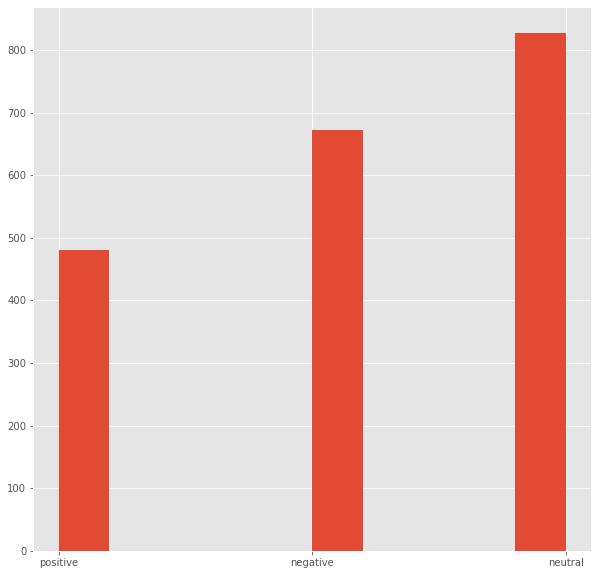

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use("ggplot")
plt.hist(yt_comment["sentiment"])

In [ ]:
#